### FIG.3 plot for examples in 3_attention/2A_save_meme.py and 2A_TEST.ipynb

### FIG. 4 plot (pie charts for motif comparison for the significant ones

In [1]:
import os, json, numpy as np, pandas as pd, shap, torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import ast
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

/home/campus.stonybrook.edu/psurana/anaconda3/envs/dnabert_aug_2025_jupyter/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_job_from_json(path, index=0):
    with open(path, "r") as f:
        obj = json.load(f)
    if isinstance(obj, list):
        job = obj[index]
    elif isinstance(obj, dict):
        job = obj
    else:
        raise ValueError("jobs.json must be dict or list")
    return job


In [5]:
jobs_path = "/data/private/psurana/TSProm/src/2_predict/jobs.json"
job_ModelB = load_job_from_json(jobs_path, index=6)
job_ModelB

{'base_model_nm': 'TSp_vs_genNullseqs',
 'subset': 'tsptestis_genNullseqs',
 'lr_dir': 'lr3e-5_ep10',
 'model_path': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/july_2025_mmseq/TSp_vs_genNullseqs/3k/tsptestis_genNullseqs/lr3e-5_ep10/checkpoint-5400',
 'data_dir': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/data/jul_2025/split/TSp_vs_genNullseqs/3k/tsptestis_genNullseqs',
 'res_pdir': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/july_2025_mmseq/RESULT/lr3e-5_ep10/TSp_vs_genNullseqs_3k_tsptestis_genNullseqs'}

In [6]:
job_ModelA = load_job_from_json(jobs_path, index=1)
job_ModelA

{'base_model_nm': 'TSp_vs_nonProm',
 'subset': 'tsptestis_nonPromHu',
 'lr_dir': 'lr3e-5_ep10',
 'model_path': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/july_2025_mmseq/TSp_vs_nonProm/3k/tsptestis_nonPromHu/lr3e-5_ep10/checkpoint-4100',
 'data_dir': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/data/jul_2025/split/TSp_vs_nonProm/3k/tsptestis_nonPromHu',
 'res_pdir': '/data/projects/dna/pallavi/DNABERT_runs/DATA_RUN/dnabert2_FineTune_Zhihan_attention_extracted/july_2025_mmseq/RESULT/lr3e-5_ep10/TSp_vs_nonProm_3k_tsptestis_nonPromHu'}

In [8]:
fileA = os.path.join(job_ModelA["res_pdir"], "motifs", "subsample_all", "filtered_tomtom_results.tsv")
fileB = os.path.join(job_ModelB["res_pdir"], "motifs", "subsample_all", "filtered_tomtom_results.tsv")

# Read into DataFrames
dfA = pd.read_csv(fileA, sep="\t")
dfB = pd.read_csv(fileB, sep="\t")

print(dfA.shape, dfB.shape)

(42, 16) (84, 16)


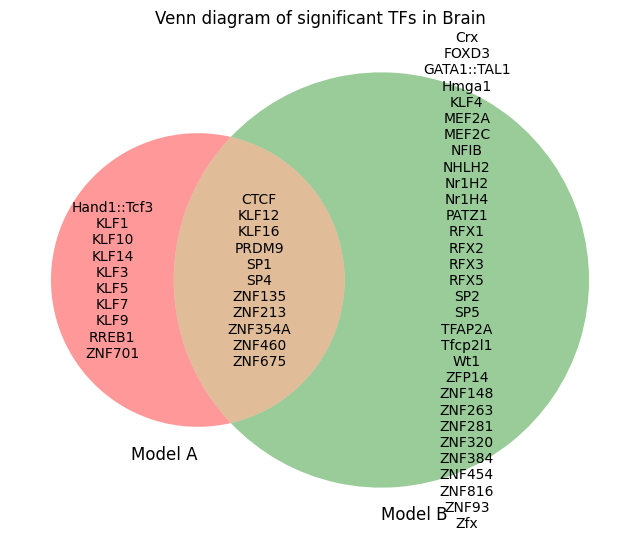

In [9]:
tfA = set(dfA['TF_name'].unique())
tfB = set(dfB['TF_name'].unique())

# Calculate subsets
onlyA = tfA - tfB
onlyB = tfB - tfA
both  = tfA & tfB

# Plot venn
plt.figure(figsize=(8,8))
v = venn2([tfA, tfB], set_labels=('Model A', 'Model B'))

# Replace counts with actual TF names (joined by commas or newlines)
v.get_label_by_id('10').set_text("\n".join(sorted(onlyA)))
v.get_label_by_id('01').set_text("\n".join(sorted(onlyB)))
v.get_label_by_id('11').set_text("\n".join(sorted(both)))

plt.title("Venn diagram of significant TFs in Brain")
plt.show()